<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

#  K-Nearest Neighbors with `scikit-learn`

_Authors: Alex Sherman (DC)_

<a id="learning-objectives"></a>
## Learning Objectives

1. Utilize the KNN model on the iris data set.
2. Implement scikit-learn's KNN model.
3. Assess the fit of a KNN Model using scikit-learn.

### Lesson Guide
- [Learning Objectives](#learning-objectives)
- [Loading the Iris Data Set](#overview-of-the-iris-dataset)
	- [Terminology](#terminology)
- [Exercise: "Human Learning" With Iris Data](#exercise-human-learning-with-iris-data)
- [Human Learning on the Iris Data Set](#human-learning-on-the-iris-dataset)
- [K-Nearest Neighbors (KNN) Classification](#k-nearest-neighbors-knn-classification)
	- [Using the Train/Test Split Procedure (K=1)](#using-the-traintest-split-procedure-k)
- [Tuning a KNN Model](#tuning-a-knn-model)
	- [What Happens If We View the Accuracy of our Training Data?](#what-happen-if-we-view-the-accuracy-of-our-training-data)
	- [Training Error Versus Testing Error](#training-error-versus-testing-error)
- [Standardizing Features](#standardizing-features)
	- [Use `StandardScaler` to Standardize our Data](#use-standardscaler-to-standardize-our-data)
- [Comparing KNN With Other Models](#comparing-knn-with-other-models)

In this lesson, we will get an intuitive and practical feel for the **k-Nearest Neighbors** model. kNN is a **non-parametric model**. So, the model is not represented as an equation with parameters (e.g. the $\beta$ values in linear regression).

First, we will make a model by hand to classify iris flower data. Next, we will automatedly make a model using kNN.

> You may have heard of the clustering algorithm **k-Means Clustering**. These techniques have nothing in common, aside from both having a parameter k!

<a id="overview-of-the-iris-dataset"></a>
## Loading the Iris Data Set
---

#### Read the iris data into a pandas DataFrame, including column names.

In [1]:
# Read the iris data into a DataFrame.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display plots in-notebook
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

data = 'data/iris.data'
iris = pd.read_csv(data)

In [2]:
# Show a sample of the data
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
143,6.8,3.2,5.9,2.3,Iris-virginica
46,5.1,3.8,1.6,0.2,Iris-setosa
148,6.2,3.4,5.4,2.3,Iris-virginica
133,6.3,2.8,5.1,1.5,Iris-virginica
5,5.4,3.9,1.7,0.4,Iris-setosa
138,6.0,3.0,4.8,1.8,Iris-virginica
21,5.1,3.7,1.5,0.4,Iris-setosa
121,5.6,2.8,4.9,2.0,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
11,4.8,3.4,1.6,0.2,Iris-setosa


In [3]:
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
iris.shape

(150, 5)

In [5]:
iris.species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

<a id="terminology"></a>
### Terminology

- **150 observations** (n=150): Each observation is one iris flower.
- **Four features** (p=4): sepal length, sepal width, petal length, and petal width.
- **Response**: One of three possible iris species (setosa, versicolor, or virginica)
- **Classification problem** because response is categorical.

<a id="exercise-human-learning-with-iris-data"></a>
## Guided Practice: "Human Learning" With Iris Data

**Question:** Can we predict the species of an iris using petal and sepal measurements? Together, we will:

1. Read the iris data into a Pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use sorting, split-apply-combine, and/or visualization to look for differences between species.
4. Write down a set of rules that could be used to predict species based on iris measurements.

**BONUS:** Define a function that accepts a row of data and returns a predicted species. Then, use that function to make predictions for all existing rows of data and check the accuracy of your predictions.

#### Gather some basic information about the data.

In [4]:
# What's the shape of the data, and what types are the columns?


In [6]:
# Verify the basic stats look appropriate
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Test for imbalanced classes
iris.species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

In [10]:
# Verify we are not missing any data
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


#### Use sorting, split-apply-combine, and/or visualization to look for differences between species.

In [12]:
# Sort the DataFrame by petal_width.
iris.sort_values('petal_width')

,sepal_length,sepal_width,petal_length,petal_width,species
32,5.2,4.1,1.5,0.1,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
0,5.1,3.5,1.4,0.2,Iris-setosa
27,5.2,3.5,1.5,0.2,Iris-setosa
28,5.2,3.4,1.4,0.2,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa


In [13]:
iris.groupby('species').petal_width.mean()

species
Iris-setosa        0.244
Iris-versicolor    1.326
Iris-virginica     2.026
Name: petal_width, dtype: float64

In [15]:
iris.groupby('species').petal_width.describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Iris-setosa,50.0,0.244,0.107210,0.1,0.2,0.2,0.3,0.6
Iris-versicolor,50.0,1.326,0.197753,1.0,1.2,1.3,1.5,1.8
Iris-virginica,50.0,2.026,0.274650,1.4,1.8,2.0,2.3,2.5


#### Split-apply-combine: Explore the data while using a `groupby` on `'species'`.

In [14]:
# Mean of sepal_length, grouped by species.
iris.groupby('species').sepal_width.mean()

species
Iris-setosa        3.418
Iris-versicolor    2.770
Iris-virginica     2.974
Name: sepal_width, dtype: float64

In [16]:
iris.groupby('species').sepal_width.describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Iris-setosa,50.0,3.418,0.381024,2.3,3.125,3.4,3.675,4.4
Iris-versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
Iris-virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


In [17]:
# Mean of all numeric columns, grouped by species.
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [18]:
# describe() of all numeric columns, grouped by species.
iris.groupby('species').describe()

sepal_length                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width         ... petal_length      petal_width         \
                      count   mean  ...          75%  max       count   mean   
species                             ...                                        
Iris-setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
species                                             
Iris-setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

Text(0, 0.5, 'Petal width')

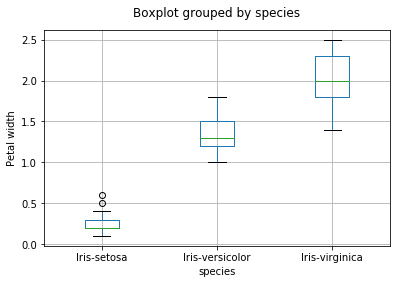

In [22]:
# Box plot of petal_width, grouped by species.
iris.boxplot(column='petal_width', by='species')
plt.title("")
plt.ylabel("Petal width")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210D4547DA0>,
      dtype=object)

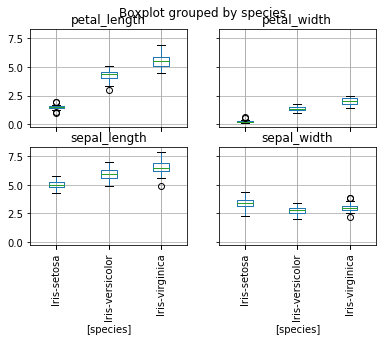

In [25]:
# Box plot of all numeric columns, grouped by species.
iris.boxplot(by='species', rot=90)

In [35]:
# Map species to a numeric value so that plots can be colored by species.
species_to_number = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris['species_number'] = iris.species.map(species_to_number)
# Alternative method:
iris['species_number'] = iris.species.factorize()[0]
iris.species.factorize?

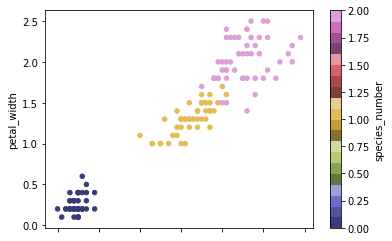

In [37]:
# Scatterplot of petal_length vs. petal_width, colored by species
iris.plot.scatter(x='petal_length', y='petal_width', c='species_number', cmap='tab20b')

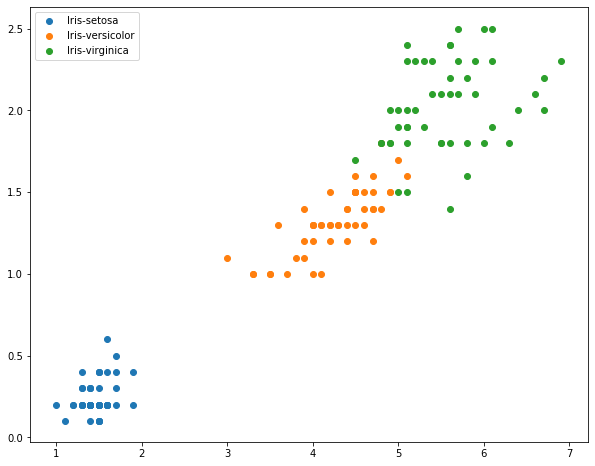

In [42]:
(fig, ax) = plt.subplots(figsize=(10,8))
ax.scatter(x=iris[iris.species == 'Iris-setosa'].petal_length,
           y=iris[iris.species == 'Iris-setosa'].petal_width,
           label='Iris-setosa'
          )
ax.scatter(x=iris[iris.species == 'Iris-versicolor'].petal_length,
           y=iris[iris.species == 'Iris-versicolor'].petal_width,
           label='Iris-versicolor'
          )
ax.scatter(x=iris[iris.species == 'Iris-virginica'].petal_length,
           y=iris[iris.species == 'Iris-virginica'].petal_width,
           label='Iris-virginica'
          )
plt.legend()

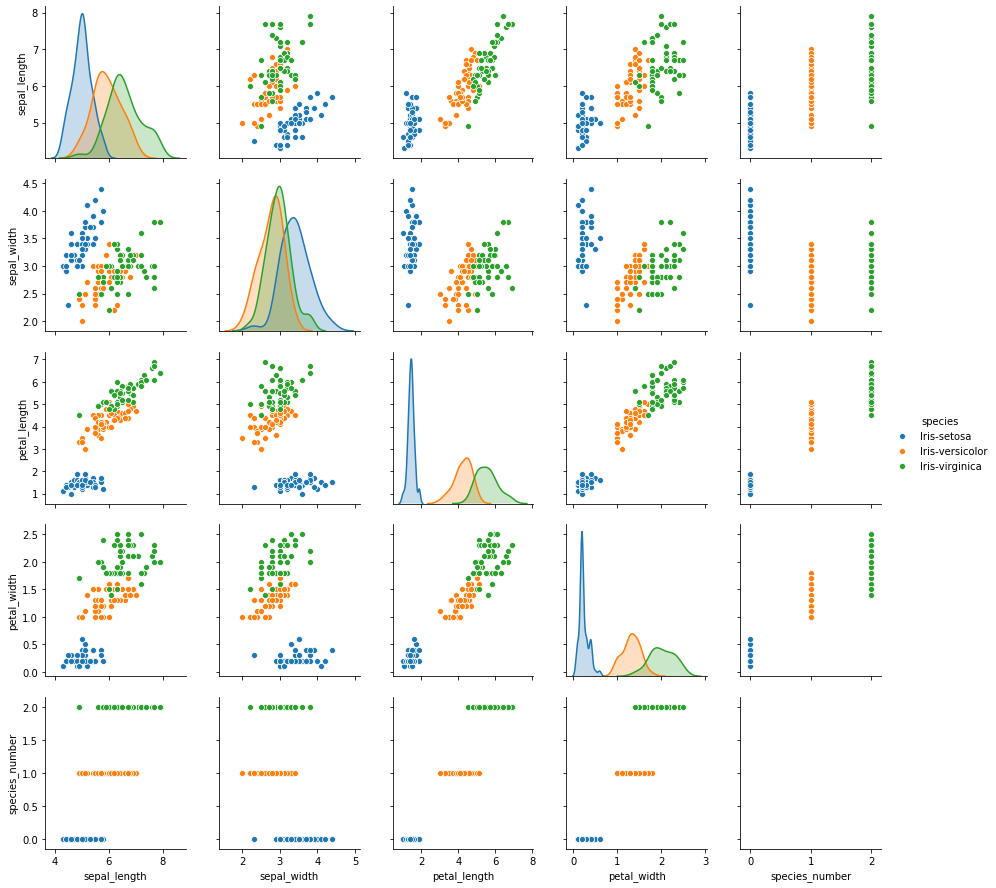

In [47]:
# Scatter matrix of all features, colored by species.
import seaborn as sns
sns.pairplot(iris, hue='species')

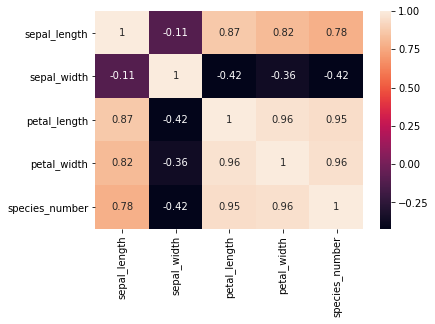

In [49]:
sns.heatmap(iris.corr(), annot=True)

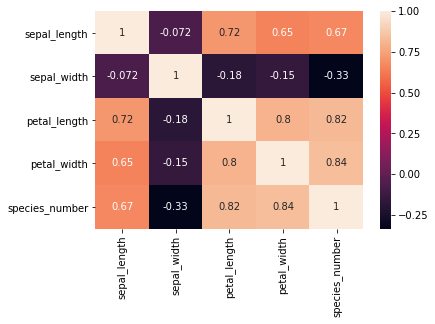

In [50]:
sns.heatmap(iris.corr('kendall'), annot=True)

#### Class Exercise: Using the graphs above, can you write down a set of rules that can accurately predict species based on iris measurements?

In [23]:
# Feel free to do more analysis if needed to make good rules!

#### Bonus: If you have time during the class break or after class, try to implement these rules to make your own classifier!

Write a function that accepts a row of data and returns a predicted species. Then, use that function to make predictions for all existing rows of data and check the accuracy of your predictions.

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,prediction
0,5.1,3.5,1.4,0.2,Iris-setosa,0,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,0,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,0,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,0,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,0,Iris-setosa


In [26]:
# Let's see what percentage your manual classifier gets correct!

0.33333333333333331

<a id="human-learning-on-the-iris-dataset"></a>

How did we (as humans) predict the species of an iris?

1. We observed that the different species had (somewhat) dissimilar measurements.
2. We focused on features that seemed to correlate with the response.
3. We created a set of rules (using those features) to predict the species of an unknown iris.

We assumed that if an **unknown iris** had measurements similar to **previous irises**, then its species was most likely the same as those previous irises.

In [27]:
# Hint, you can create a custom color map.
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

---

<a id="k-nearest-neighbors-knn-classification"></a>
## K-Nearest Neighbors (KNN) Classification
---

K-nearest neighbors classification is (as its name implies) a classification model that uses the "K" most similar observations in order to make a prediction.

KNN is a supervised learning method; therefore, the training data must have known target values.

The process of of prediction using KNN is fairly straightforward:

1. Pick a value for K.
2. Search for the K observations in the data that are "nearest" to the measurements of the unknown iris.
    - Euclidian distance is often used as the distance metric, but other metrics are allowed.
3. Use the most popular response value from the K "nearest neighbors" as the predicted response value for the unknown iris.

The visualizations below show how a given area can change in its prediction as K changes.

- Colored points represent true values and colored areas represent a **prediction space**. (This is called a Voronoi Diagram.)
- Each prediction space is wgere the majority of the "K" nearest points are the color of the space.
- To predict the class of a new point, we guess the class corresponding to the color of the space it lies in.

<a id="knn-classification-map-for-iris-k"></a>
### KNN Classification Map for Iris (K=1)

![1NN classification map](./assets/iris_01nn_map.png)

### KNN Classification Map for Iris (K=5)

![5NN classification map](./assets/iris_05nn_map.png)

### KNN Classification Map for Iris (K=15)

![15NN classification map](./assets/iris_15nn_map.png)

<a id="knn-classification-map-for-iris-k"></a>
### KNN Classification Map for Iris (K=50)

![50NN classification map](./assets/iris_50nn_map.png)

In [62]:
import sklearn.model_selection
(Xtrain, Xtest, Ytrain, Ytest) = sklearn.model_selection.train_test_split(
    iris[['sepal_width', 'sepal_length', 'petal_width', 'petal_length']], iris.species,
    random_state=456,
    test_size=10
)
import sklearn.neighbors
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(Xtrain, Ytrain)
predictions = knn.predict(Xtest)
how_it_went_df = pd.DataFrame({'actual': Ytest, 'prediction': predictions})
how_it_went_df['correct'] = how_it_went_df.actual == how_it_went_df.prediction
how_it_went_df

,actual,prediction,correct
113,Iris-virginica,Iris-virginica,True
94,Iris-versicolor,Iris-versicolor,True
1,Iris-setosa,Iris-setosa,True
88,Iris-versicolor,Iris-versicolor,True
2,Iris-setosa,Iris-setosa,True
146,Iris-virginica,Iris-virginica,True
135,Iris-virginica,Iris-virginica,True
64,Iris-versicolor,Iris-versicolor,True
121,Iris-virginica,Iris-virginica,True
59,Iris-versicolor,Iris-versicolor,True


We can see that, as K increases, the classification spaces' borders become more distinct. However, you can also see that the spaces are not perfectly pure when it comes to the known elements within them.

**How are outliers affected by K?** As K increases, outliers are "smoothed out". Look at the above three plots and notice how outliers strongly affect the prediction space when K=1. When K=50, outliers no longer affect region boundaries. This is a classic bias-variance tradeoff -- with increasing K, the bias increases but the variance decreases.

**Question:** What's the "best" value for K in this case?

**Answer:** ...

## Guided Intro to KNN: NBA Position KNN Classifier

For the rest of the lesson, we will be using a dataset containing the 2015 season statistics for ~500 NBA players. This dataset leads to a nice choice of K, as we'll see below. The columns we'll use for features (and the target 'pos') are:


| Column | Meaning |
| ---    | ---     |
| pos | C: Center. F: Front. G: Guard |
| ast | Assists per game | 
| stl | Steals per game | 
| blk | Blocks per game |
| tov | Turnovers per game | 
| pf  | Personal fouls per game | 

For information about the other columns, see [this glossary](https://www.basketball-reference.com/about/glossary.html).

In [63]:
# Read the NBA data into a DataFrame.
path = 'data/NBA_players_2015.csv'
nba = pd.read_csv(path, index_col=0)

In [64]:
nba.sample(5)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg_,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
season_end,,,,,,,,,,,,,,,,,,,,,
2015,Isaiah Thomas,G,25,TOT,56,1,26.0,5.0,11.8,0.422,...,13.1,27.2,4.2,0.8,5.0,0.165,4.4,-2.8,1.6,1.3
2015,Brandon Davies,F,23,TOT,27,6,15.7,2.0,5.1,0.401,...,15.9,19.0,-0.2,0.4,0.2,0.026,-3.0,-0.1,-3.1,-0.1
2015,Marreese Speights,F,27,GSW,58,9,16.7,4.4,8.9,0.494,...,10.3,29.1,1.8,1.4,3.2,0.159,-1.5,-1.5,-3.1,-0.3
2015,Patrick Beverley,G,26,HOU,49,48,30.9,3.7,9.6,0.381,...,13.0,16.3,1.5,1.7,3.2,0.102,0.6,0.6,1.1,1.2
2015,P.J. Hairston,G,22,CHO,35,2,15.0,1.9,6.1,0.321,...,7.1,20.7,-0.5,0.7,0.2,0.020,-2.2,-1.1,-3.2,-0.2


In [15]:
# Map positions to numbers

In [65]:
# Create feature matrix (X).
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']

<a id="using-the-traintest-split-procedure-k"></a>
### Using the Train/Test Split Procedure (K=1)

#### Step 1: Split X and y into training and testing sets (using `random_state` for reproducibility).

In [66]:
(Xtrain, Xtest, Ytrain, Ytest) = sklearn.model_selection.train_test_split(
    nba[feature_cols], nba.pos,
    random_state=777
)

#### Step 2: Train the model on the training set (using K=1).

In [67]:
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(Xtrain, Ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

#### Step 3: Test the model on the testing set and check the accuracy.

In [71]:
predictions = knn.predict(Xtest)

In [72]:
sklearn.metrics.accuracy_score(Ytest, predictions)

0.5583333333333333

**Question:** If we had trained on the entire dataset and tested on the entire dataset, using 1-KNN what accuracy would we likely get? If the resulting accuracy is not this number, what must some data points look like?

**Answer:** ...

#### Repeating for K=50.

In [73]:
knn50 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=50)
knn50.fit(Xtrain, Ytrain)
sklearn.metrics.accuracy_score(Ytest, knn50.predict(Xtest) )

0.6583333333333333

**Question:** Suppose we again train and test on the entire data set, but using 50-KNN. Would we expect the accuracy to be higher, lower, or the same as compared to 1-KNN?

**Answer:** ...

#### Comparing Testing Accuracy With Null Accuracy

Null accuracy is the accuracy that can be achieved by **always predicting the most frequent class**. For example, if most players are Centers, we would always predict Center.

The null accuracy is a benchmark against which you may want to measure every classification model.

#### Examine the class distribution from the training set.

Remember that we are comparing KNN to this simpler model. So, we must find the most frequent class **of the training set**.

In [74]:
nba.pos.value_counts()

G    200
F    199
C     79
Name: pos, dtype: int64

In [76]:
200.0 / nba.shape[0]

0.41841004184100417

#### Compute null accuracy using the DummyClassifier

In [80]:
import sklearn.dummy
dummy = sklearn.dummy.DummyClassifier(strategy='most_frequent')
dummy.fit(Xtrain, Ytrain)
sklearn.metrics.accuracy_score(Ytest, dummy.predict(Xtest) )

0.3333333333333333

In [82]:
dummy.predict([[]])

array(['G'], dtype='<U1')

In [83]:
Ytest.value_counts()

F    56
G    40
C    24
Name: pos, dtype: int64

In [78]:
dummy = sklearn.dummy.DummyClassifier(strategy='constant', constant='F')

<a id="tuning-a-knn-model"></a>
## Tuning a KNN Model
---

In [ ]:
# Instantiate the model (using the value K=5).

In [ ]:
# Fit the model with data.

In [43]:
# Store the predicted response values.

**Question:** Which model produced the correct predictions for the two unknown irises?

**Answer:** ...

**Question:** Does that mean that we have to guess how well our models are likely to do?

**Answer:** ...

In [84]:
# Calculate predicted probabilities of class membership.
# Each row sums to one and contains the probabilities of the point being a 0-Center, 1-Front, 2-Guard.

knn50.predict_proba(Xtest)

array([[0.02, 0.24, 0.74],
       [0.32, 0.6 , 0.08],
       [0.12, 0.48, 0.4 ],
       [0.08, 0.66, 0.26],
       [0.5 , 0.4 , 0.1 ],
       [0.44, 0.44, 0.12],
       [0.3 , 0.56, 0.14],
       [0.04, 0.14, 0.82],
       [0.  , 0.1 , 0.9 ],
       [0.22, 0.68, 0.1 ],
       [0.22, 0.58, 0.2 ],
       [0.04, 0.6 , 0.36],
       [0.02, 0.5 , 0.48],
       [0.54, 0.4 , 0.06],
       [0.  , 0.28, 0.72],
       [0.08, 0.22, 0.7 ],
       [0.22, 0.62, 0.16],
       [0.02, 0.56, 0.42],
       [0.02, 0.44, 0.54],
       [0.16, 0.58, 0.26],
       [0.02, 0.4 , 0.58],
       [0.46, 0.46, 0.08],
       [0.02, 0.36, 0.62],
       [0.12, 0.72, 0.16],
       [0.12, 0.48, 0.4 ],
       [0.16, 0.52, 0.32],
       [0.18, 0.4 , 0.42],
       [0.18, 0.52, 0.3 ],
       [0.28, 0.46, 0.26],
       [0.14, 0.46, 0.4 ],
       [0.1 , 0.5 , 0.4 ],
       [0.1 , 0.3 , 0.6 ],
       [0.22, 0.58, 0.2 ],
       [0.36, 0.56, 0.08],
       [0.14, 0.52, 0.34],
       [0.  , 0.14, 0.86],
       [0.16, 0.52, 0.32],
 

In [85]:
knn50.classes_

array(['C', 'F', 'G'], dtype=object)

In [86]:
knn50.predict(Xtest)

array(['G', 'F', 'F', 'F', 'C', 'C', 'F', 'G', 'G', 'F', 'F', 'F', 'F',
       'C', 'G', 'G', 'F', 'F', 'G', 'F', 'G', 'C', 'G', 'F', 'F', 'F',
       'G', 'F', 'F', 'F', 'F', 'G', 'F', 'F', 'F', 'G', 'F', 'F', 'F',
       'G', 'G', 'G', 'C', 'F', 'F', 'F', 'G', 'F', 'F', 'G', 'G', 'G',
       'G', 'F', 'F', 'F', 'G', 'C', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'G', 'G', 'F', 'F', 'G', 'G', 'F', 'G', 'C', 'F', 'F', 'G', 'F',
       'F', 'C', 'G', 'F', 'F', 'F', 'F', 'F', 'G', 'G', 'F', 'G', 'G',
       'G', 'F', 'F', 'F', 'G', 'G', 'F', 'G', 'F', 'G', 'F', 'C', 'F',
       'F', 'G', 'F', 'F', 'G', 'G', 'G', 'C', 'F', 'F', 'F', 'F', 'G',
       'F', 'F', 'F'], dtype=object)

In [87]:
knn.predict_proba(Xtest)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0

<a id="what-happen-if-we-view-the-accuracy-of-our-training-data"></a>
### What Happens If We View the Accuracy of our Training Data?

Create a graph for k=1 to 100; evaluate the accuracy on the training data itself (even though this is
generally a bad idea).

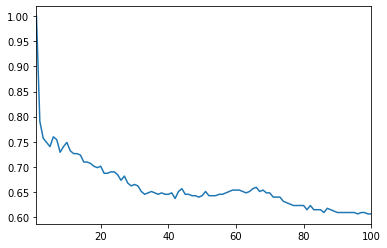

In [90]:
scores = []
for k in range(1, 101):
    knn_k = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(Xtrain, Ytrain)
    scores.append(sklearn.metrics.accuracy_score(Ytrain, knn_k.predict(Xtrain)))
scores_series = pd.Series(index=range(1,101), data=scores)
scores_series.plot()

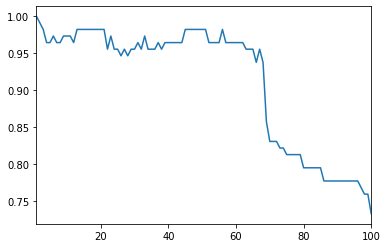

In [108]:
scores = []
iris_xtrain, iris_xtest, iris_ytrain, iris_ytest = sklearn.model_selection.train_test_split(
  iris[['petal_length', 'petal_width']], iris.species
)
for k in range(1, 101):
    knn_k = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(iris_xtrain, iris_ytrain)
    scores.append(sklearn.metrics.accuracy_score(iris_ytrain, knn_k.predict(iris_xtrain)))
iris_scores_series = pd.Series(index=range(1,101), data=scores)
iris_scores_series.plot()

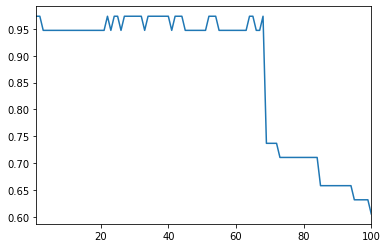

In [110]:
scores = []
for k in range(1, 101):
    knn_k = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(iris_xtrain, iris_ytrain)
    scores.append(sklearn.metrics.accuracy_score(iris_ytest, knn_k.predict(iris_xtest)))
iris_test_scores_series = pd.Series(index=range(1,101), data=scores)
iris_test_scores_series.plot()

**Question:** As K increases, why does the accuracy fall?

**Answer:** ...

#### Search for the "best" value of K.

Do the same, but use the test data.

Normally you would do cross-validation within the training
data, but we're just illustrating the point here.

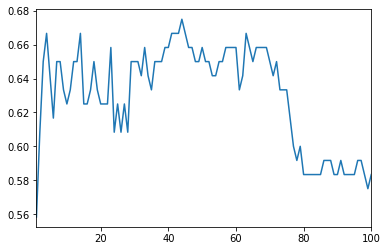

In [92]:
scores = []
for k in range(1, 101):
    knn_k = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(Xtrain, Ytrain)
    scores.append(sklearn.metrics.accuracy_score(Ytest, knn_k.predict(Xtest)))
test_scores_series = pd.Series(index=range(1,101), data=scores)
test_scores_series.plot()

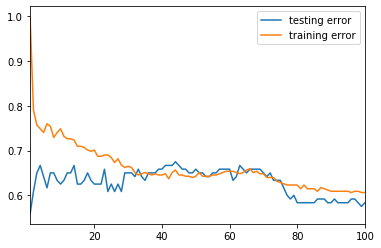

In [93]:
# Create a DataFrame of K, training error, and testing error values.
evaluations = pd.DataFrame({'testing error': test_scores_series,
                           'training error': scores_series})
evaluations.plot()

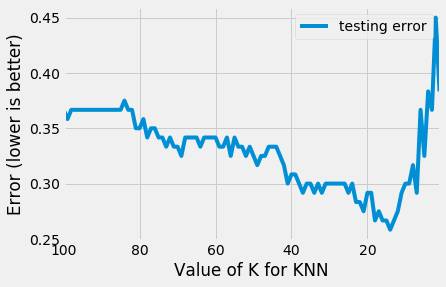

In [50]:
# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.

In [51]:
# Find the minimum testing error and the associated K value.

,testing error,training error
K,,
14,0.258333,0.299163
13,0.266667,0.307531
18,0.266667,0.307531
16,0.266667,0.299163
15,0.266667,0.309623


<a id="training-error-versus-testing-error"></a>
### Training Error Versus Testing Error

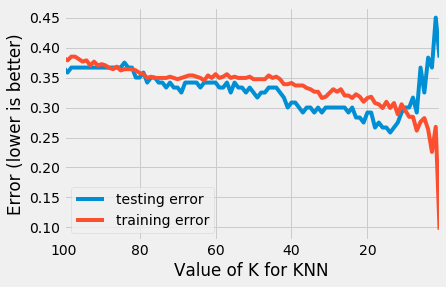

In [53]:
# Plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR.

- **Training error** decreases as model complexity increases (lower value of K).
- **Testing error** is minimized at the optimum model complexity.

Evaluating the training and testing error is important. For example:

- If the training error is much lower than the test error, then our model is likely overfitting. 
- If the test error starts increasing as we vary a hyperparameter, we may be overfitting.
- If either error plateaus, our model is likely underfitting (not complex enough).

#### Making Predictions on Out-of-Sample Data

Given the statistics of a (truly) unknown NBA player, how do we predict his position?

array([2])

What could we conclude?

- When using KNN on this data set with these features, the **best value for K** is likely to be around 14.
- Given the statistics of an **unknown player**, we estimate that we would be able to correctly predict his position about 74% of the time.

# How we really find the right value of K

The result above is heavily dependent on the random split of training and testing. If we run it again,
we might find a different number.

So we really want to use cross-validation to find the best value of $k$ so that we get a good representation
of different test data in our choice.

`scikit-learn` includes an estimator called `GridSearchCV` that wraps an existing estimator.

In [103]:
%%time
# Use GridSearchCV to find a good value of k.
grid_params = {
    'n_neighbors': range(1,101),
    'p': [1,1.5, 2],
    'weights': ['uniform', 'distance']
}
knn_classifier = sklearn.neighbors.KNeighborsClassifier()
grid_search = sklearn.model_selection.GridSearchCV(
    knn_classifier,
    scoring='accuracy',
    param_grid=grid_params,
    cv=5,
    n_jobs=2
)
grid_search.fit(Xtrain, Ytrain)

Wall time: 21.6 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=2,
             param_grid={'n_neighbors': range(1, 101), 'p': [1, 1.5, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [104]:
grid_search.best_params_

{'n_neighbors': 12, 'p': 2, 'weights': 'distance'}

In [105]:
grid_search.best_score_

0.6899441340782123

In [101]:
sklearn.metrics.accuracy_score(Ytest, grid_search.predict(Xtest))

0.6583333333333333

In [102]:
likely_best_knn = sklearn.neighbors.KNeighborsClassifier(
 n_neighbors=12, p=2, weights='distance')
likely_best_knn.fit(Xtrain, Ytrain)
sklearn.metrics.accuracy_score(Ytest, likely_best_knn.predict(Xtest))

0.6583333333333333

<a id="standardizing-features"></a>
## Standardizing Features
---

There is one major issue that applies to many machine learning models: They are sensitive to feature scale. 

> KNN in particular is sensitive to feature scale because it (by default) uses the Euclidean distance metric. To determine closeness, Euclidean distance sums the square difference along each axis. So, if one axis has large differences and another has small differences, the former axis will contribute much more to the distance than the latter axis.

This means that it matters whether our feature are centered around zero and have similar variance to each other.

Unfortunately, most data does not naturally start at a mean of zero and a shared variance. Other models tend to struggle with scale as well, even linear regression, when you get into more advanced methods such as regularization.

Fortuantely, this is an easy fix.

<a id="use-standardscaler-to-standardize-our-data"></a>
### Use `StandardScaler` to Standardize our Data

StandardScaler standardizes our data by subtracting the mean from each feature and dividing by its standard deviation.

#### Separate feature matrix and response for scikit-learn.

In [111]:
# Create feature matrix (X).
feature_cols

['ast', 'stl', 'blk', 'tov', 'pf']

#### Create the train/test split.

Notice that we create the train/test split first. This is because we will reveal information about our testing data if we standardize right away.

In [112]:
Xtrain

,ast,stl,blk,tov,pf
season_end,,,,,
2015,0.8,0.4,0.1,0.9,1.4
2015,1.8,1.3,1.1,1.2,2.0
2015,4.9,0.7,0.0,2.2,1.6
2015,0.4,0.1,0.1,0.3,0.8
2015,1.0,0.6,0.9,1.0,2.1
2015,1.1,0.9,0.3,1.0,1.8
2015,0.6,0.3,0.7,1.0,2.3
2015,0.7,0.5,0.3,1.8,2.5
2015,3.1,0.8,0.0,1.3,0.9


#### Instantiate and fit `StandardScaler`.

In [114]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(Xtrain)

In [118]:
xtrain_scaled_pandas = pd.DataFrame(data=xtrain_scaled, columns=Xtrain.columns)
xtrain_scaled_pandas.head(5)

,ast,stl,blk,tov,pf
0,-0.583524,-0.576276,-0.645453,-0.342770,-0.472611
1,-0.033783,1.482217,1.712426,0.032113,0.362232
2,1.670413,0.109888,-0.881241,1.281721,-0.194330
3,-0.803420,-1.262440,-0.645453,-1.092535,-1.307454
4,-0.473575,-0.118833,1.240850,-0.217809,0.501372


In [119]:
Xtrain.head(5)

,ast,stl,blk,tov,pf
season_end,,,,,
2015,0.8,0.4,0.1,0.9,1.4
2015,1.8,1.3,1.1,1.2,2.0
2015,4.9,0.7,0.0,2.2,1.6
2015,0.4,0.1,0.1,0.3,0.8
2015,1.0,0.6,0.9,1.0,2.1


In [120]:
xtrain_scaled_pandas.describe()

,ast,stl,blk,tov,pf
count,3.580000e+02,3.580000e+02,3.580000e+02,3.580000e+02,3.580000e+02
mean,-1.020289e-16,-1.625019e-16,-2.294874e-17,-4.310642e-17,-2.859289e-16
std,1.001400e+00,1.001400e+00,1.001400e+00,1.001400e+00,1.001400e+00
min,-1.023316e+00,-1.491161e+00,-8.812409e-01,-1.467417e+00,-2.420577e+00
25%,-6.934717e-01,-8.049970e-01,-6.454530e-01,-7.176523e-01,-6.117515e-01
50%,-3.636273e-01,-1.188329e-01,-1.738771e-01,-2.178089e-01,-5.518978e-02
75%,3.510355e-01,5.673312e-01,6.191080e-02,4.069954e-01,7.796529e-01
max,4.584038e+00,3.540709e+00,5.720821e+00,3.780938e+00,2.310198e+00


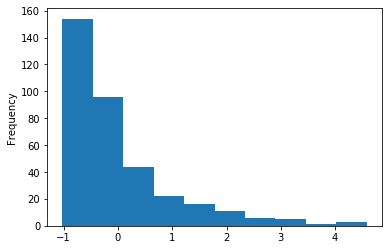

In [121]:
xtrain_scaled_pandas.ast.plot.hist()

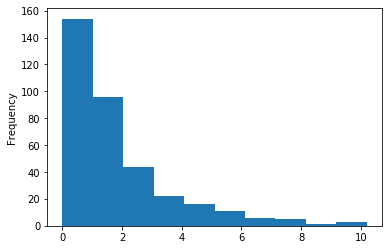

In [122]:
Xtrain.ast.plot.hist()

#### Fit a KNN model and look at the testing error.
Can you find a number of neighbors that improves our results from before?

In [124]:
%%time
# Calculate testing error.

# Use GridSearchCV to find a good value of k.
grid_params = {
    'n_neighbors': range(1,101),
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}
knn_classifier = sklearn.neighbors.KNeighborsClassifier()
grid_search = sklearn.model_selection.GridSearchCV(
    knn_classifier,
    scoring='accuracy',
    param_grid=grid_params,
    cv=5,
    n_jobs=2
)
grid_search.fit(xtrain_scaled, Ytrain)

Wall time: 12.2 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=2,
             param_grid={'n_neighbors': range(1, 101), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [125]:
grid_search.best_score_

0.6899441340782123

In [126]:
grid_search.best_params_

{'n_neighbors': 14, 'p': 1, 'weights': 'uniform'}

In [127]:
sklearn.metrics.accuracy_score(Ytest, grid_search.predict(scaler.transform(Xtest)))

0.6333333333333333

# Other Neighbor models

- RadiusNeighboursClassifier
- NearestCentroid (we'll talk about this when we talk about clustering)
- KNeighboursRegressor
- RadiusNeighboursRegressor

<a id="comparing-knn-with-other-models"></a>
## Comparing KNN With Other Models
---

**Advantages of KNN:**

- It's simple to understand and explain.
- Model training is fast.
- It can be used for classification and regression (for regression, take the average value of the K nearest points!).
- Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.
- It works well when the relationship isn't linear, but you don't have enough data for 

**Disadvantages of KNN:**

- It must store all of the training data.
- Its prediction phase can be slow when n is large.
- It is sensitive to irrelevant features.
- It is sensitive to the scale of the data.
- Accuracy is (generally) not competitive with the best supervised learning methods.